<h1>1 How to Tensorflow in like 10 minutes</h1>

<h3>1.1 Intro</h3>

Tensorflow is a powerful library built by Google for numerical computation, and it's particularly well-suited (according to its fans) for large-scale ML tasks. Along with PyTorch, Tensorflow is one of the most popular Deep Learning libraries available. Perhaps most importantly thought, it is one of the easier ML libraries to get a hang of, which is why Delineo is going to use it (for now at least). This guide is not meant to be any sort of introduction to AI/ML in general. If you need that look at section 1.3, where you can find some recommendations on where to start. The purpose of this guide is to show you how models are built in Tensorflow, more specifically using the Tensorflow.keras API, if you are coming from PyTorch, theano, caffe, MATLAB, etc.

<h3>1.2 The Tensorflow API</h3>

The Tensorflow API is quite extensive and pretty well documented. At the highest level, Tensorflow has the Keras and Estimators API, which offers a really easy and intuitive way to build models. Between the two, Keras is your best shot because it is easier to use and also the developers at TensorFlow say so. This guide will deal exclusively with building models using Keras. There are also a bunch of lower level APIs, such as the losses, metrics, optimizers, train, initializers, and nn APIs which allow you to muck with tensors directly. Working with the lower level APIs takes considerably more effort so I'm not going to talk about those unless I really have to at some later point.   

<h3>1.3 Learning AI/ML in General</h3>

There's really no correct way to answer the question "How does one go about learning AI/Machine Learning?" I think the easiest, most obvious place to start is just by taking a class, whether at JHU or somewhere else (Andrew Ng's coursera on machine learning is a great resource if you don't want to wait to take the class), to see if this branch of computer science is even your cup of tea. Taking those classes will also give you the intuition you sort of need to approach machine learning problems as well. At a very broad and naive level, I like to think of AI/machine learning as using multivariable calculus to do linear algebra to do probability and statistics, with diff eq/optimization sprinkled in there as well. As such, a strong background in math is needed in order to really understand what it is you are doing. Textbooks like 'Machine Learning: A Probabilistic Perspective' by Kevin Murphy do a good job of showing you what you're in for by not holding back any of the math and throwing equation after equation after equation at you. However, in my experience, most books that take a heavy-handed mathematical approach to ML generally don't touch on implementation/how to use common ML frameworks. On the other end of the spectrum, books like 'Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow' by Aurelien Geron provide a great resource for using the libraries mentioned in the title, but don't go into enough mathematical rigor. So ML can sort of look like a black-box where you shove vectors/tensors into a model and magically get an output. If you're completely new to this, my recommendation would be to start with Andrew Ng's coursera class (if you haven't already taken/are enrolled in JHU's intro ML class) and then also get a book like Hands-On ML and start from there. That way you can get start developing an intuition for how ML works while also having a resource that teaches you how to practically apply what you've learned using modern tools. Because absolutely nobody these days uses MATLAB for ML (that's what Andrew Ng uses, granted his class was recorded many years ago so I guess it's not entirely his fault).    

<h1>2 Regression Neural Network w/ Sequential API</h1>

<h3>2.1 The Sequential API</h3>

Like I said earlier, we're using keras.tensorflow to build our models for now. The two main API's offered by Keras to build models are the Sequential API and the Functional API. The Sequential API is the easiest and is used when you're building networks comprised of a stack of layers, where each layer has one input tensor and one output tensor. We'll be building a regression model of the California housing dataset, beacuse for some reason literally everyone uses this dataset and I'm not going to stray too far from the herd on this one. 

In [1]:
from tensorflow import keras

#sklearn is another pretty common library with lots of prebuilt supervised/unsupervised learning algorithms. 
#We just want their data though and a few functions for splitting our dataset into training and test sets, as 
#well as the ability to scale our input features.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()

#Split data to get training and test set 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

#Further split X_train_full and y_train_full into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [3]:
#Scale our training, validation, and test sets

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Ok so here's the actual creation of the model. The first step is to define your layers, and literally sequentially list them in your call to the Sequential constructor. I'm just going to create a model with one dense hidden layer that has 30 neurons usig ReLu activation.

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

Once it's built, you can easily see a summary of your model by calling the summary() method

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


The next step is to actually compile your model, where you tell the model what your loss function should be and what optimizer you want to use. Here we'll use mean squared error for the loss function and stoachastic gradient descent for the optimizer. You can find a list of available pre-built loss functions here:https://keras.io/api/losses/, and optimizers here: https://keras.io/api/optimizers/

In [16]:
model.compile(loss="mean_squared_error", optimizer="sgd")

And lastly, we can actually go ahead and train the network via the fit() function. You can pass the fit() function your training set, validation set, and also the number of epochs you want to train the model on. 

In [17]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1727 - val_loss: 0.9038
Epoch 2/20
363/363 [==============================] - 0s 922us/step - loss: 1.1245 - val_loss: 0.3806
Epoch 3/20
363/363 [==============================] - 0s 941us/step - loss: 0.4131 - val_loss: 0.3764
Epoch 4/20
363/363 [==============================] - 0s 947us/step - loss: 0.3918 - val_loss: 0.3618
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 0.3500
Epoch 6/20
363/363 [==============================] - 0s 980us/step - loss: 0.3752 - val_loss: 0.3442
Epoch 7/20
363/363 [==============================] - 0s 958us/step - loss: 0.4653 - val_loss: 0.4021
Epoch 8/20
363/363 [==============================] - 0s 911us/step - loss: 0.4805 - val_loss: 0.3701
Epoch 9/20
363/363 [==============================] - 0s 908us/step - loss: 0.3991 - val_loss: 0.3661
Epoch 10/20
363/363 [==============================] - 0s 922us/step - loss: 0.3781 - 

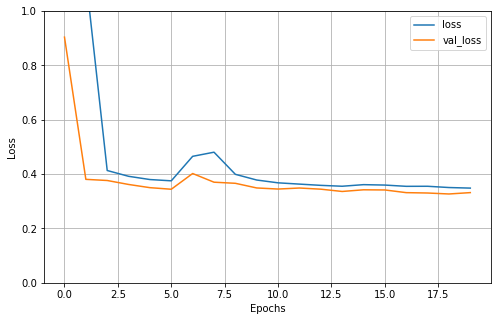

In [18]:
#Here's a quick way to see how your loss function is doing over your epochs.

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

<h1>3 The Functional API</h3>

<h3>3.1 Functional API Explained</h3>

As you just saw, the building a model using the Sequential API is very easy. However, if you want to build networks with multiple inputs or outputs, a network with layer sharing, or a network with a more complicated topology (ie layers aren't connected sequentially), then you'll have to use the Functional API. To illustrate, we'll build a wide & deep neural network, which connects part or all of the inputs directly to the output layer, making it possible for models that follow this architecture to learn both deep patterns (using the deep path) and simple patterns (through the short path).

In [23]:
#Create two Input objects that specifies the input the model will get. The first input layer will take features 0 to 4 
#through the wide path. The second input layer sends features 2 to 7 through the deep path.
input_ = keras.Input(shape = X_train.shape[1:])

#Dense layer with 30 neurons. Uses Rectified Linear Unit activation function. 
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

#Another, second dense layer with 30 neurons that takes the outputs from hidden1.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#Create a Concatenate layer which puts together the input and the output of the second hidden layer.
concat = keras.layers.Concatenate()([input_, hidden2])

#Create an output layer with a single neuron and no activation function.
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

The biggest advantage of using the Functional API, as you can see above, is that you can specify exactly which layers connect by passing the reference to one layer to another. Once the model is built, compilation and training is exactly the same as with the Sequential API. 

In [24]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train, X_train), y_train, epochs = 30, validation_data=((X_valid, X_valid), y_valid))

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 1.6563 - val_loss: 0.7322
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7068 - val_loss: 0.6405
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6481 - val_loss: 0.5970
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6123 - val_loss: 0.5680
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5862 - val_loss: 0.5455
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5662 - val_loss: 0.5320
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5524 - val_loss: 0.5180
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5408 - val_loss: 0.5092
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5319 - val_loss: 0.5015
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5233 - val_loss: 0.4921

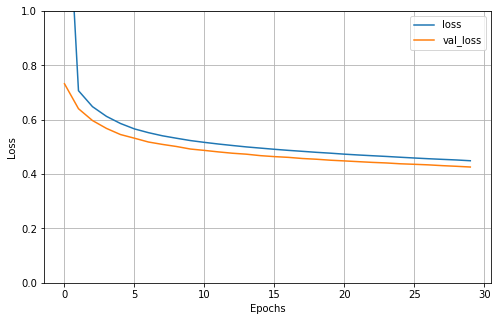

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_1[0][0]                    
                                                                 dense_7[0][0]              

So yeah, that's the basic gist of it. Hopefully all of this looks a little bit familiar- especially if you're coming from PyTorch. There are all sorts of layers that you can add to your models using either the Sequential or Functional API. All the layers available in keras can be found at https://keras.io/api/layers/. If you have any questions feel free to reach out and I'll try my best to answer!